# Remove Seasonality - part B

We can also remove seasonality by applying a centred-moving average. Let's see this approach applied to the Airline Passengers dataset.

Let's import first the libraries we need:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ingest the data
data_set = pd.read_csv('data/airline_passengers.csv',infer_datetime_format=True,parse_dates=["Month"])

/var/folders/3k/djbzqdt5427f47w1g2w616jh0000gn/T/ipykernel_53058/4022013844.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_set = pd.read_csv('data/airline_passengers.csv',infer_datetime_format=True,parse_dates=["Month"])


In [3]:
# add the column moy (i.e., month of year) and year to use later on to compute the seasonal component
data_set['moy'] = data_set["Month"].dt.month
data_set['year'] = data_set["Month"].dt.year 

In [4]:
# set the index
data_set.set_index("Month", inplace=True)

In [5]:
# compute the centred moving average and the moving average
data_set['centred-MA'] = data_set['Thousands of Passengers'].rolling(window=12, center=True).mean()
data_set['MA'] = data_set['Thousands of Passengers'].rolling(window=12, center=False).mean()

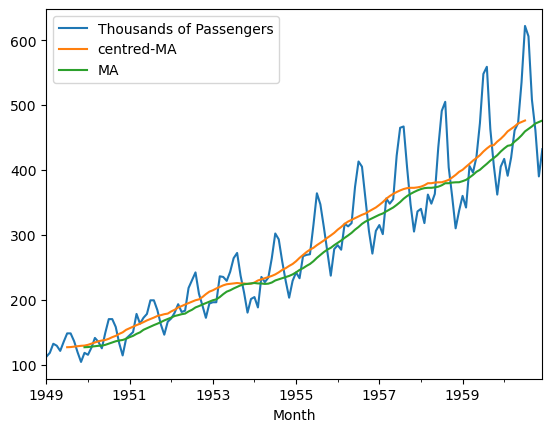

In [6]:
# visualize the original data and the two moving averages
data_set[["Thousands of Passengers","centred-MA","MA"]].plot()
plt.show()

## Additive removal

In [7]:
data_set['add_detrended'] = data_set['Thousands of Passengers']-data_set['centred-MA']

<Axes: xlabel='Month'>

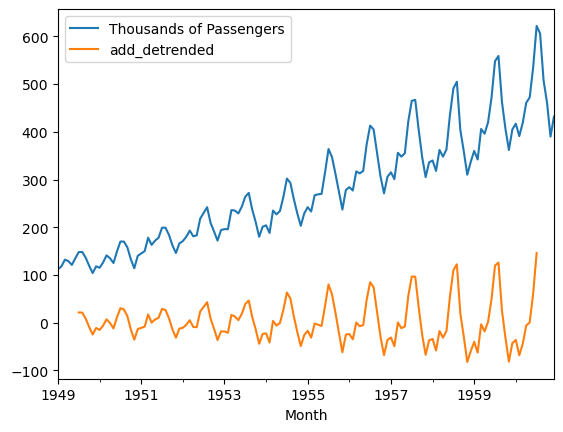

In [8]:
data_set[["Thousands of Passengers","add_detrended"]].plot()

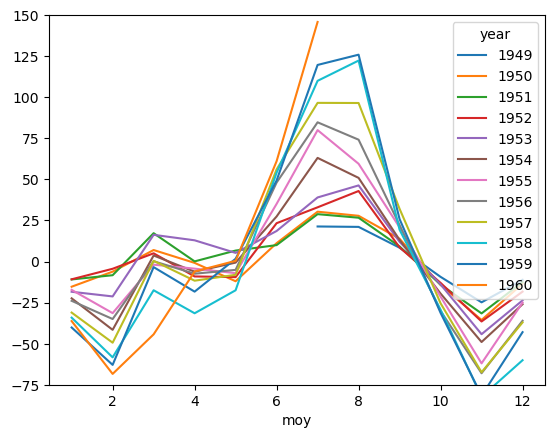

In [9]:
moys = data_set.pivot(index='moy', columns='year', values='add_detrended')
ax = moys.plot()
ax.set_ylim([-75,150])
plt.show()

Once we obtain the detrended time series, we group the data by the month of the year (moy) and compute the mean:

In [10]:
subsequence = data_set[["add_detrended","moy"]].groupby(["moy"]).mean()
subsequence.rename(columns={"add_detrended": "add_season"},inplace=True)

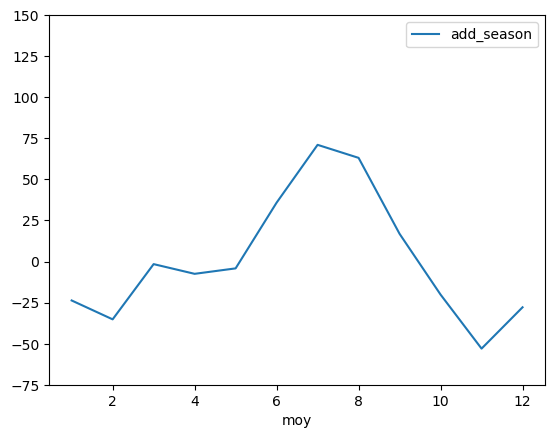

In [11]:
ax = subsequence.plot()
ax.set_ylim([-75,150])
plt.show()

In [12]:
mean = subsequence.mean()

In [13]:
subsequence["add_season"] = subsequence["add_season"]-float(mean)

/var/folders/3k/djbzqdt5427f47w1g2w616jh0000gn/T/ipykernel_53058/2335513618.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  subsequence["add_season"] = subsequence["add_season"]-float(mean)


After obtaining one seasonal component, we create our seasonal time series by duplicating for the number of cycles present in the data (in this case 12):

In [14]:
seasonal_component = subsequence
for i in range(0,11):
    seasonal_component = pd.concat([seasonal_component,subsequence])
seasonal_component = seasonal_component.reset_index()

<Axes: >

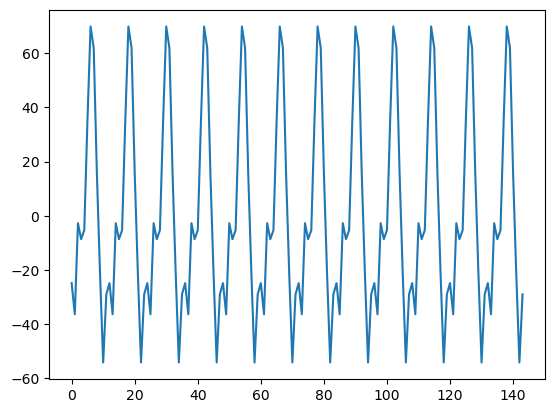

In [15]:
seasonal_component["add_season"].plot()

In [16]:
data_set['add_deseasoned'] = data_set['Thousands of Passengers'].values - seasonal_component["add_season"].values
data_set['add_deseasoned & add_detrended'] = data_set['add_detrended'].values - seasonal_component["add_season"].values

<Axes: xlabel='Month'>

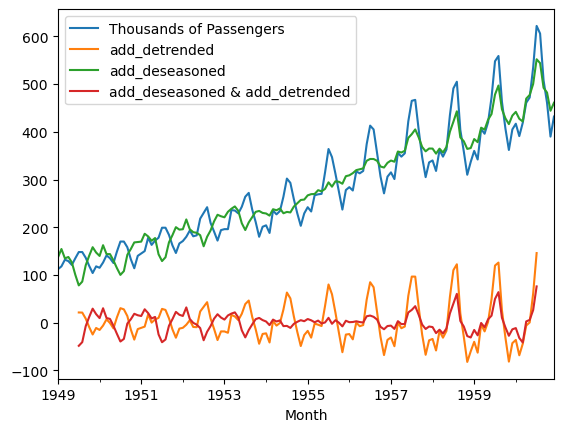

In [17]:
data_set[["Thousands of Passengers","add_detrended",'add_deseasoned','add_deseasoned & add_detrended']].plot()

<Axes: xlabel='Month'>

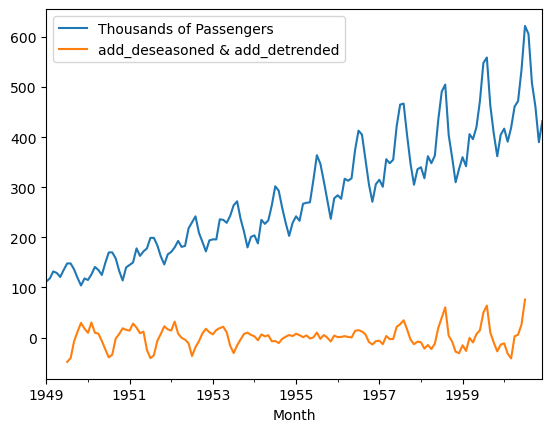

In [18]:
data_set[["Thousands of Passengers",'add_deseasoned & add_detrended']].plot()

## Multiplicative removal

In [19]:
data_set['mul_detrended'] = data_set['Thousands of Passengers']/data_set['centred-MA'] 

<Axes: xlabel='Month'>

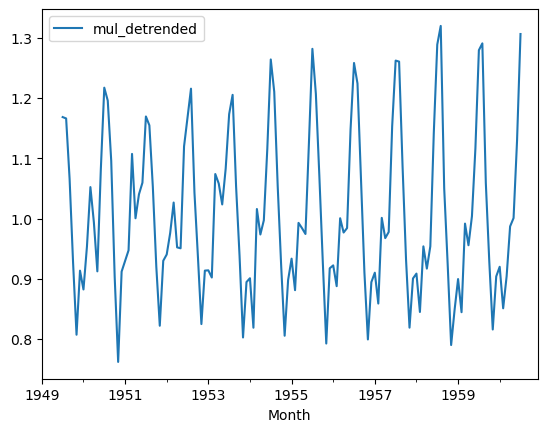

In [20]:
data_set[["mul_detrended"]].plot()

recall the shape of the addictive modeling

<Axes: xlabel='Month'>

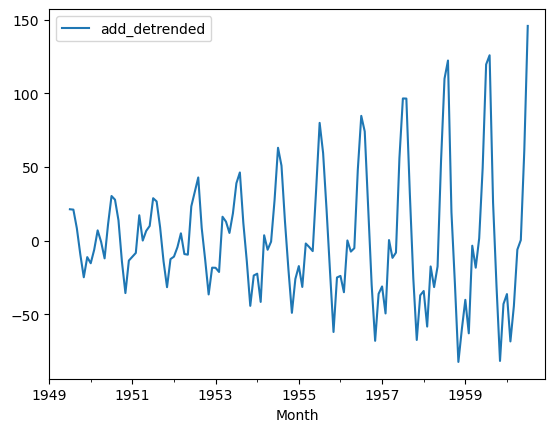

In [21]:
data_set[["add_detrended"]].plot() 

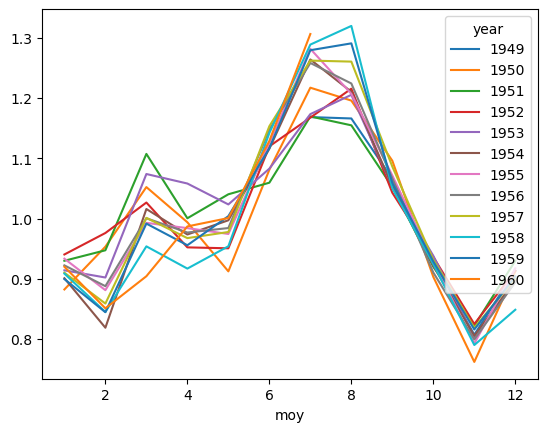

In [22]:
moys = data_set.pivot(index='moy', columns='year', values='mul_detrended')
ax = moys.plot()
plt.show()

**NOTE**: note the y scale! The addictive model is in [-75,150], while the multiplicative is in [0.8,1.3]

Once we obtain the detrended time series, we group the data by the month of the year (moy) and compute the mean:

In [23]:
subsequence = data_set[["mul_detrended","moy"]].groupby(["moy"]).mean()
subsequence.rename(columns={"mul_detrended": "mul_season"},inplace=True)

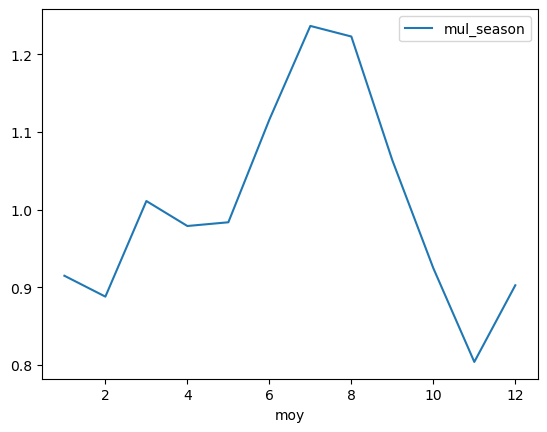

In [24]:
ax = subsequence.plot()
plt.show()

In [25]:
mean = subsequence.mean()

In [26]:
subsequence["mul_season"] = subsequence["mul_season"]/float(mean)

/var/folders/3k/djbzqdt5427f47w1g2w616jh0000gn/T/ipykernel_53058/1613659217.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  subsequence["mul_season"] = subsequence["mul_season"]/float(mean)


After obtaining one seasonal component, we create our seasonal time series by duplicating for the number of cycles present in the data (in this case 12):

In [27]:
seasonal_component = subsequence
for i in range(0,11):
    seasonal_component = pd.concat([seasonal_component,subsequence])
seasonal_component = seasonal_component.reset_index()

<Axes: >

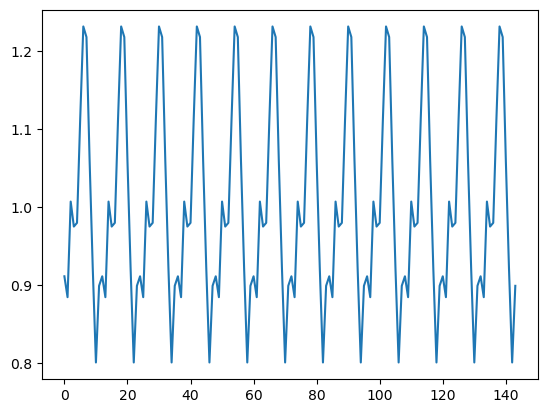

In [28]:
seasonal_component["mul_season"].plot()

In [29]:
data_set['mul_deseasoned'] = data_set['Thousands of Passengers'].values / seasonal_component["mul_season"].values
data_set['mul_deseasoned & mul_detrended'] = data_set['mul_detrended'].values / seasonal_component["mul_season"].values

<Axes: xlabel='Month'>

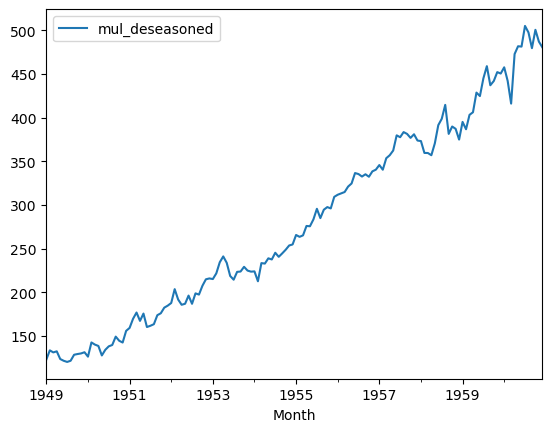

In [30]:
data_set[['mul_deseasoned']].plot()

<Axes: xlabel='Month'>

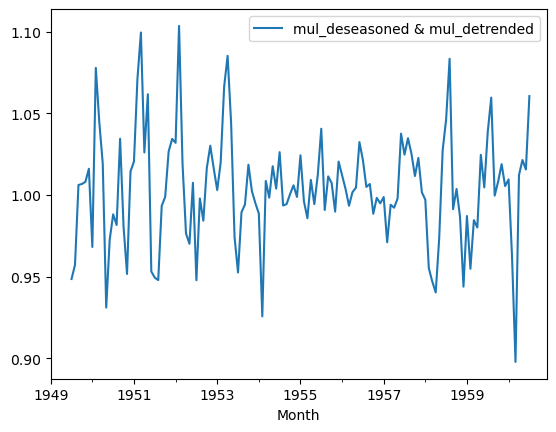

In [31]:
data_set[['mul_deseasoned & mul_detrended']].plot()